In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv


# 1. Importing the Dataset

In [3]:
data=pd.read_csv("/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv")

In [4]:
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
data.shape

(2640, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

# 2. Data Cleaning

In [7]:
data=data.drop(columns={'city', 'source','industries','countryOfCitizenship', 'organization','status','birthDate','title','date','state','residenceStateRegion','birthYear',
                       'birthMonth','birthDay','latitude_country','longitude_country','population_country'},axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   selfMade                                    2640 non-null   bool   
 7   gender                                      2640 non-null   object 
 8   lastName                                    2640 non-null   object 
 9   firstName                                   2637 non-null   object 
 10  cpi_country 

In [9]:
data['firstName']= data['firstName']+' '+data['lastName']


In [10]:
data.drop(columns={'lastName'},inplace=True)


In [11]:
data.rename(columns={'firstName':'name'},inplace=True)


# 3. Removing special characters from columns

In [12]:
data['gdp_country'] = data['gdp_country'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)
data['gdp_country'] = data['gdp_country'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)
data['gdp_country'] = data['gdp_country'].astype('float')

In [13]:
data.head(20)

,rank,finalWorth,category,personName,age,country,selfMade,gender,name,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,False,M,Bernard Arnault,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7
1,2,180000,Automotive,Elon Musk,51.0,United States,True,M,Elon Musk,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
2,3,114000,Technology,Jeff Bezos,59.0,United States,True,M,Jeff Bezos,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
3,4,107000,Technology,Larry Ellison,78.0,United States,True,M,Larry Ellison,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,True,M,Warren Buffett,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
5,6,104000,Technology,Bill Gates,67.0,United States,True,M,Bill Gates,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,True,M,Michael Bloomberg,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,True,M,Carlos Slim Helu,141.54,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1
8,9,83400,Diversified,Mukesh Ambani,65.0,India,False,M,Mukesh Ambani,180.44,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7
9,10,80700,Technology,Steve Ballmer,67.0,United States,True,M,Steve Ballmer,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6


# 4. Identifying  Null Values

In [14]:
data.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                            65
country                                        38
selfMade                                        0
gender                                          0
name                                            3
cpi_country                                   184
cpi_change_country                            184
gdp_country                                   164
gross_tertiary_education_enrollment           182
gross_primary_education_enrollment_country    181
life_expectancy_country                       182
tax_revenue_country_country                   183
total_tax_rate_country                        182
dtype: int64

In [15]:
data['country'].fillna('others',inplace=True)

In [16]:
data['name'].fillna('others', inplace=True)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2640 non-null   object 
 6   selfMade                                    2640 non-null   bool   
 7   gender                                      2640 non-null   object 
 8   name                                        2640 non-null   object 
 9   cpi_country                                 2456 non-null   float64
 10  cpi_change_c

In [18]:
columns_with_null=['age','cpi_country','cpi_change_country','gdp_country','gross_tertiary_education_enrollment',
                'gross_primary_education_enrollment_country','life_expectancy_country','tax_revenue_country_country','total_tax_rate_country']

In [19]:
for col in columns_with_null:
    mean_value= data[col].mean()
    data[col]=data[col].fillna(mean_value)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2640 non-null   float64
 5   country                                     2640 non-null   object 
 6   selfMade                                    2640 non-null   bool   
 7   gender                                      2640 non-null   object 
 8   name                                        2640 non-null   object 
 9   cpi_country                                 2640 non-null   float64
 10  cpi_change_c

All the null values have been taken care of

# 5. Static Analysis

In [21]:
df= data.copy()

In [22]:
df.head()

,rank,finalWorth,category,personName,age,country,selfMade,gender,name,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,False,M,Bernard Arnault,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7
1,2,180000,Automotive,Elon Musk,51.0,United States,True,M,Elon Musk,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
2,3,114000,Technology,Jeff Bezos,59.0,United States,True,M,Jeff Bezos,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
3,4,107000,Technology,Larry Ellison,78.0,United States,True,M,Larry Ellison,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,True,M,Warren Buffett,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6


In [23]:
df.describe()

,rank,finalWorth,age,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,1289.159091,4623.787879,65.140194,127.755204,4.364169,1.158287e+13,67.225671,102.858520,78.122823,12.546235,43.963344
std,739.693726,9834.240939,13.093803,25.514096,3.495150,9.273280e+12,20.594299,4.546553,3.599177,5.179139,11.719011
min,1.000000,1000.000000,18.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000
25%,659.000000,1500.000000,56.000000,117.240000,1.700000,1.839758e+12,50.600000,100.200000,77.000000,9.600000,36.600000
50%,1312.000000,2300.000000,65.140194,117.240000,3.000000,1.158287e+13,67.225671,101.800000,78.500000,10.100000,43.963344
75%,1905.000000,4200.000000,74.000000,125.080000,7.500000,2.142770e+13,88.200000,102.858520,80.900000,12.546235,59.100000
max,2540.000000,211000.000000,101.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000


# 5.1 Top 10 Billionaires

In [94]:
Top_10_billionaires = df.sort_values(['finalWorth'], ascending=False).head(10)
Top_10_billionaires

,rank,finalWorth,category,personName,age,country,selfMade,gender,name,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,False,M,Bernard Arnault,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7
1,2,180000,Automotive,Elon Musk,51.0,United States,True,M,Elon Musk,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
2,3,114000,Technology,Jeff Bezos,59.0,United States,True,M,Jeff Bezos,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
3,4,107000,Technology,Larry Ellison,78.0,United States,True,M,Larry Ellison,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,True,M,Warren Buffett,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
5,6,104000,Technology,Bill Gates,67.0,United States,True,M,Bill Gates,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,True,M,Michael Bloomberg,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,True,M,Carlos Slim Helu,141.54,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1
8,9,83400,Diversified,Mukesh Ambani,65.0,India,False,M,Mukesh Ambani,180.44,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7
9,10,80700,Technology,Steve Ballmer,67.0,United States,True,M,Steve Ballmer,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6


Text(0, 0.5, 'Worth(in Dollars)')

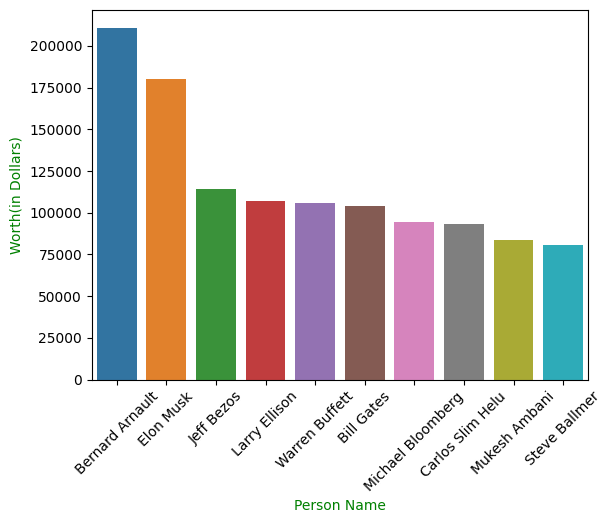

In [25]:
top_10= sns.barplot(data=Top_10_billionaires, x='name', y='finalWorth')
plt.xticks(rotation=45)
plt.xlabel('Person Name', color='green')
plt.ylabel('Worth(in Dollars)',color='green')



# 5.2 Country with the most number of Billionaires

In [26]:
country_data= df['country']
country_count= country_data.value_counts()
top_10_country= country_count.head(10)



In [27]:
top_10_country

country
United States     754
China             523
India             157
Germany           102
United Kingdom     82
Russia             79
Switzerland        78
Hong Kong          68
Italy              55
Singapore          46
Name: count, dtype: int64

In [28]:
top_10_country= top_10_country.reset_index()

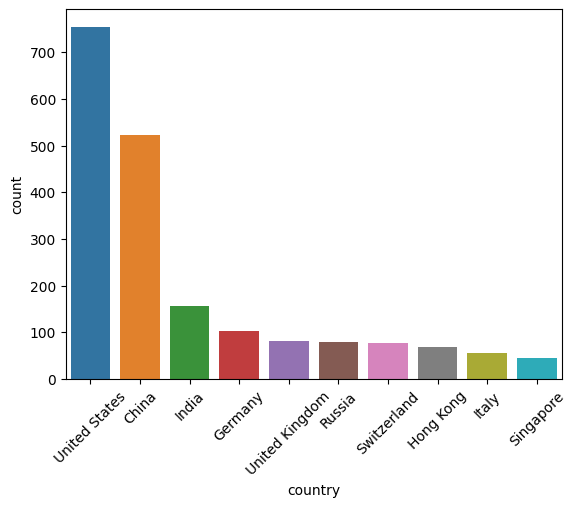

In [29]:
sns.barplot(data=top_10_country, y=top_10_country['count']
            ,x= top_10_country['country'])
plt.xticks(rotation=45)
plt.show()


# 5.3 Top 10 Country with maximum worth

In [30]:
top_10_country_wrt_totalWorth = df.groupby(['country'])['finalWorth'].sum().reset_index().sort_values('finalWorth', ascending=False).head(10)

In [31]:
top_10_country_wrt_totalWorth

,country,finalWorth
74,United States,4575100
16,China,1805500
31,India,628700
24,France,499500
26,Germany,462100
65,Switzerland,409900
73,United Kingdom,370700
58,Russia,351000
29,Hong Kong,321500
13,Canada,173900


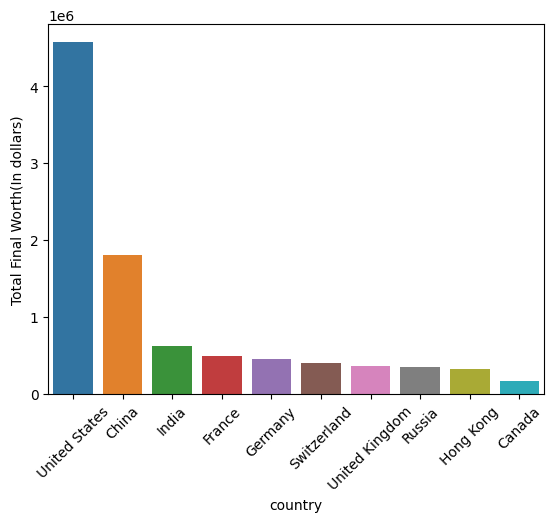

In [32]:
sns.barplot(data=top_10_country_wrt_totalWorth, x='country', y='finalWorth')
plt.xticks(rotation=45)
plt.ylabel('Total Final Worth(In dollars)')
plt.show()

# 5.4 Ratio of Male-Female

([<matplotlib.patches.Wedge at 0x789f910a5690>,
 [Text(-1.0127257511618748, 0.4294025534782216, 'M'),
  Text(1.0127257511618746, -0.4294025534782217, 'F')],
 [Text(-0.5523958642701134, 0.23421957462448445, '87.2%'),
  Text(0.5523958642701133, -0.23421957462448453, '12.8%')])

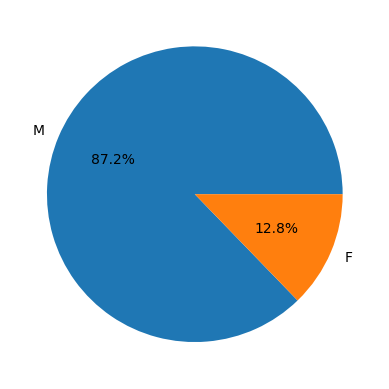

In [33]:
gender_distribution= df['gender'].value_counts().reset_index()


plt.pie(gender_distribution['count'], labels=gender_distribution['gender'],autopct='%1.1f%%')

# 5.5 Self-Made v/s Inherited

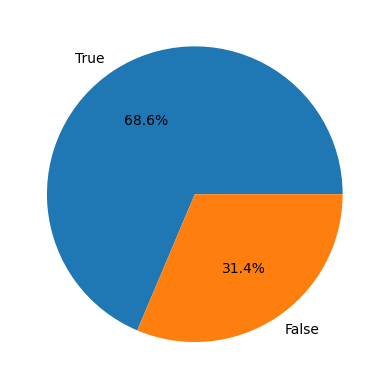

In [34]:
self_vs_inherited= df['selfMade'].value_counts().reset_index()
plt.pie(self_vs_inherited['count'], labels=self_vs_inherited['selfMade'] ,autopct='%1.1f%%')
plt.show()

# 5.6 Age Frequency

<Axes: xlabel='age', ylabel='Count'>

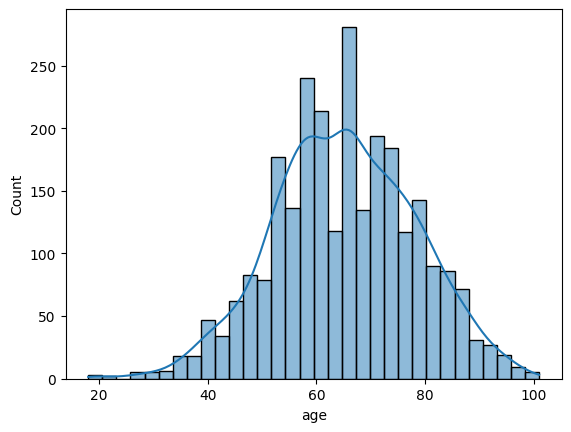

In [35]:
sns.histplot(df['age'], kde=True)

# 5.7 Category Frequency

<Axes: xlabel='category', ylabel='count'>

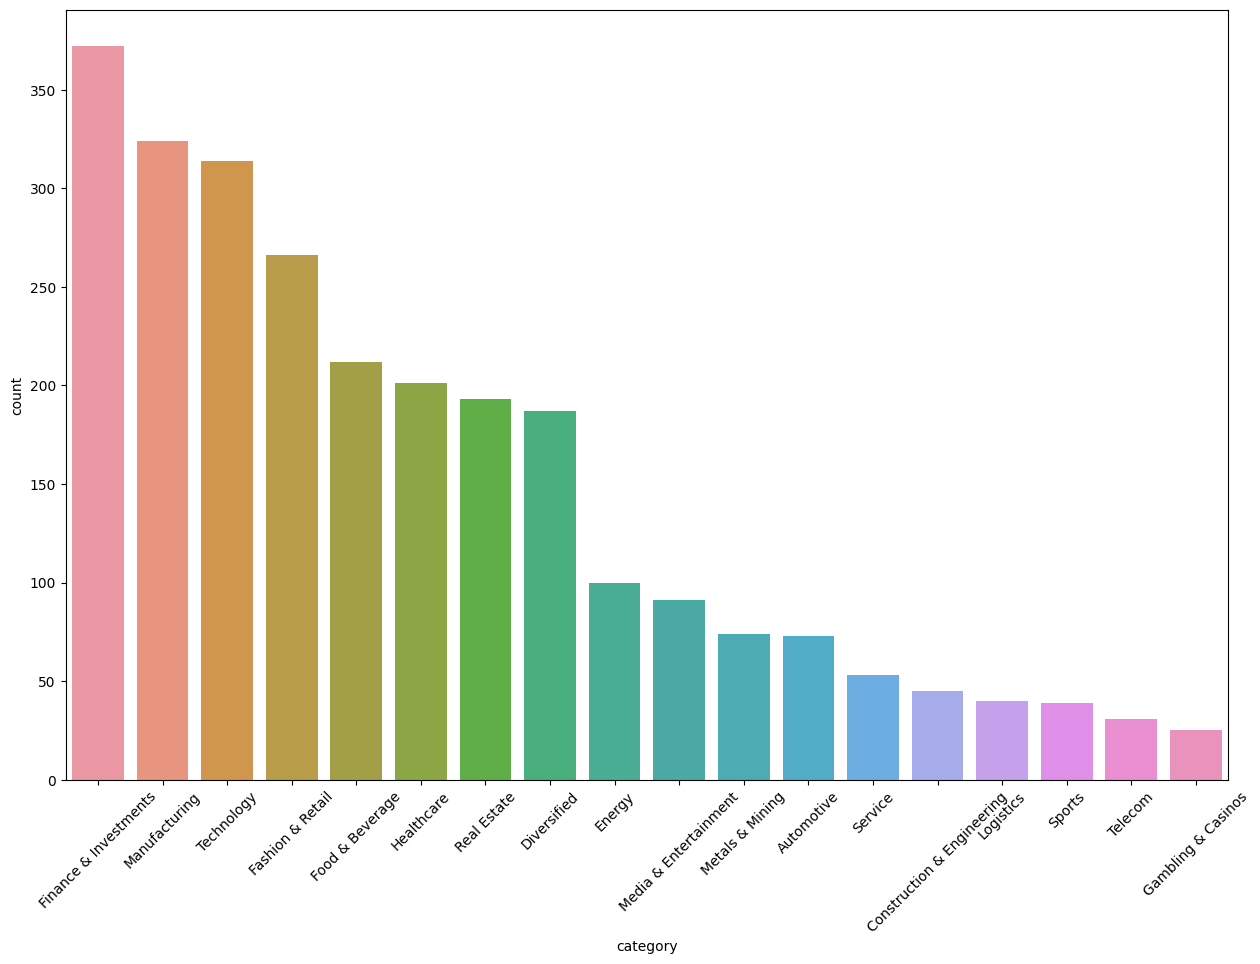

In [75]:
plt.figure(figsize=(15,10))

category_frequency= df['category'].value_counts().reset_index()

g= sns.barplot(data=category_frequency, x='category', y='count')
plt.xticks(rotation=45)
g


5.8 

In [76]:
df.head()

,rank,finalWorth,category,personName,age,country,selfMade,gender,name,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,False,M,Bernard Arnault,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7
1,2,180000,Automotive,Elon Musk,51.0,United States,True,M,Elon Musk,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
2,3,114000,Technology,Jeff Bezos,59.0,United States,True,M,Jeff Bezos,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
3,4,107000,Technology,Larry Ellison,78.0,United States,True,M,Larry Ellison,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,True,M,Warren Buffett,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6


# 5.8 Relation b/w the wealth and the gdp of a country

In [82]:
country_billionaire_wealth= df.groupby(['country'])['finalWorth'].sum().reset_index().sort_values('finalWorth', ascending=False)
country_gdp = df[['country','gdp_country']]
country_gdp = country_gdp.drop_duplicates()


In [83]:
country_gdp

,country,gdp_country
0,France,2.715518e+12
1,United States,2.142770e+13
7,Mexico,1.258287e+12
8,India,2.611000e+12
12,Spain,1.394116e+12
...,...,...
1925,Tanzania,6.317707e+10
1966,Bahrain,3.857407e+10
1979,Peru,2.268481e+11
2002,Andorra,3.154058e+09


<Axes: xlabel='finalWorth', ylabel='gdp_country'>

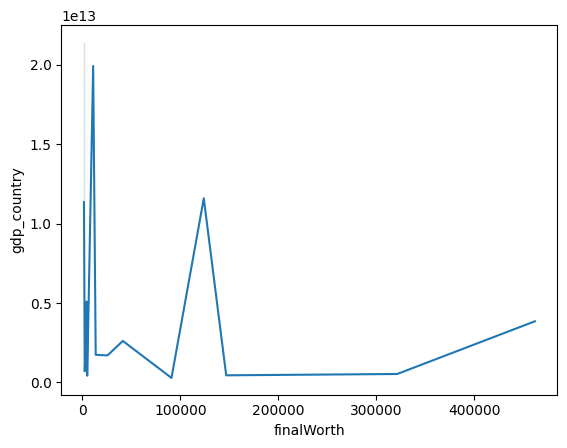

In [86]:
sns.lineplot(x= country_billionaire_wealth['finalWorth'],y=country_gdp['gdp_country'], )

# 5.9 Wealth v/s tax revenue

In [87]:
country_billionaire_wealth= df.groupby(['country'])['finalWorth'].sum().reset_index().sort_values('finalWorth', ascending=False)
tax_revenue = df[['country','tax_revenue_country_country']]
tax_revenue = tax_revenue.drop_duplicates()
tax_revenue

,country,tax_revenue_country_country
0,France,24.200000
1,United States,9.600000
7,Mexico,13.100000
8,India,11.200000
12,Spain,14.200000
...,...,...
1925,Tanzania,11.500000
1966,Bahrain,4.200000
1979,Peru,14.300000
2002,Andorra,12.546235


Text(0, 0.5, 'tax_revenue')

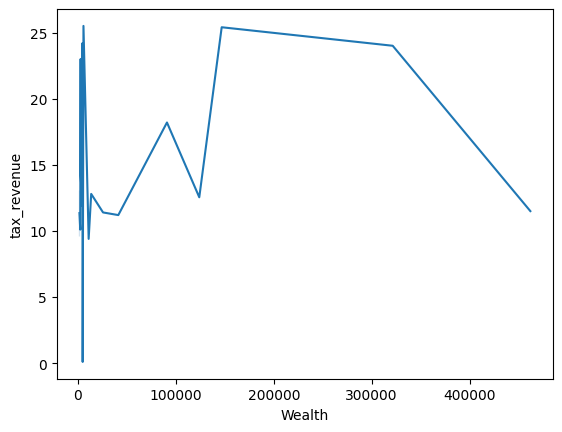

In [91]:
sns.lineplot(x= country_billionaire_wealth['finalWorth'],y=tax_revenue['tax_revenue_country_country'])
plt.xlabel('Wealth')
plt.ylabel('tax_revenue')